# ML Project 2
Joseph Bentivegna  
Professor Keene  
10/11/17  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from random import shuffle
from numpy.core.umath_tests import inner1d

In [2]:
numObs = 25
beta = 25
alpha = 2

In [3]:
def learnGaus(x, y, num):
    
    # setup variables
    x = np.atleast_2d(x)
    y = np.atleast_2d(y)
        
    CovMat = np.zeros((num, num))
    
    # setup kernel and covar-matrix
    for i in range(0, num):
        for j in range(0, num):
            if (i == j):
                CovMat[i, j] = kernel(x[0,i], x[0,j]) + beta**-1
            else:
                CovMat[i, j] = kernel(x[0,i], x[0,j])
    
    # calculate mean and sd
    mean = kernel(x.T, np.atleast_2d(np.linspace(0,1))).T @ np.linalg.inv(CovMat).T @ y.T
    SD = (1+beta**-1) - np.atleast_2d(np.diag((kernel(x.T, np.atleast_2d(np.linspace(0,1))).T @ np.linalg.inv(CovMat).T @ kernel(x.T, np.atleast_2d(np.linspace(0,1))))))

    return mean, SD

In [4]:
def kernel(a, b):
    
    temp = np.exp((-(np.absolute(a-b))**2) / (2*.09))
    
    return temp

In [5]:
def plotTruth(ax):
    
    x = np.linspace(0, 1)
    y = np.sin(2*np.pi*x)
    ax.plot(x, y, color='green')
    
    return ax

In [6]:
def plotObs(num, ax):
    
    ax.scatter(x[:num], y[:num])
    
    return ax

In [7]:
def plotPrediction(mean, SD, ax):
    
    # setup variables
    x = np.linspace(0, 1)
    
    # set bounds
    upBound = mean - np.sqrt(SD.T)
    lowBound = mean + np.sqrt(SD.T)
    
    # plot
    ax.fill_between(x, upBound.squeeze(), lowBound.squeeze(), facecolor='red', alpha=0.3, interpolate=True)
    ax.plot(x, mean.squeeze(), color='red')
    
    return ax

In [8]:
# generate Observations
x = np.linspace(0, 1, numObs)
shuffle(x)
y = np.sin(2*np.pi*x) + np.random.normal(0, np.sqrt(1/beta), numObs)

# learning from 1st obs
m1, SD1 = learnGaus(x[0], y[0], 1)

# learning from 2nd obs
m2, SD2 = learnGaus(x[0:2], y[0:2], 2)

# learning from 4rd obs
m4, SD4 = learnGaus(x[0:4], y[0:4], 4)

# learning from rest of obs
m25, SD25 = learnGaus(x[0:25], y[0:25], 25)

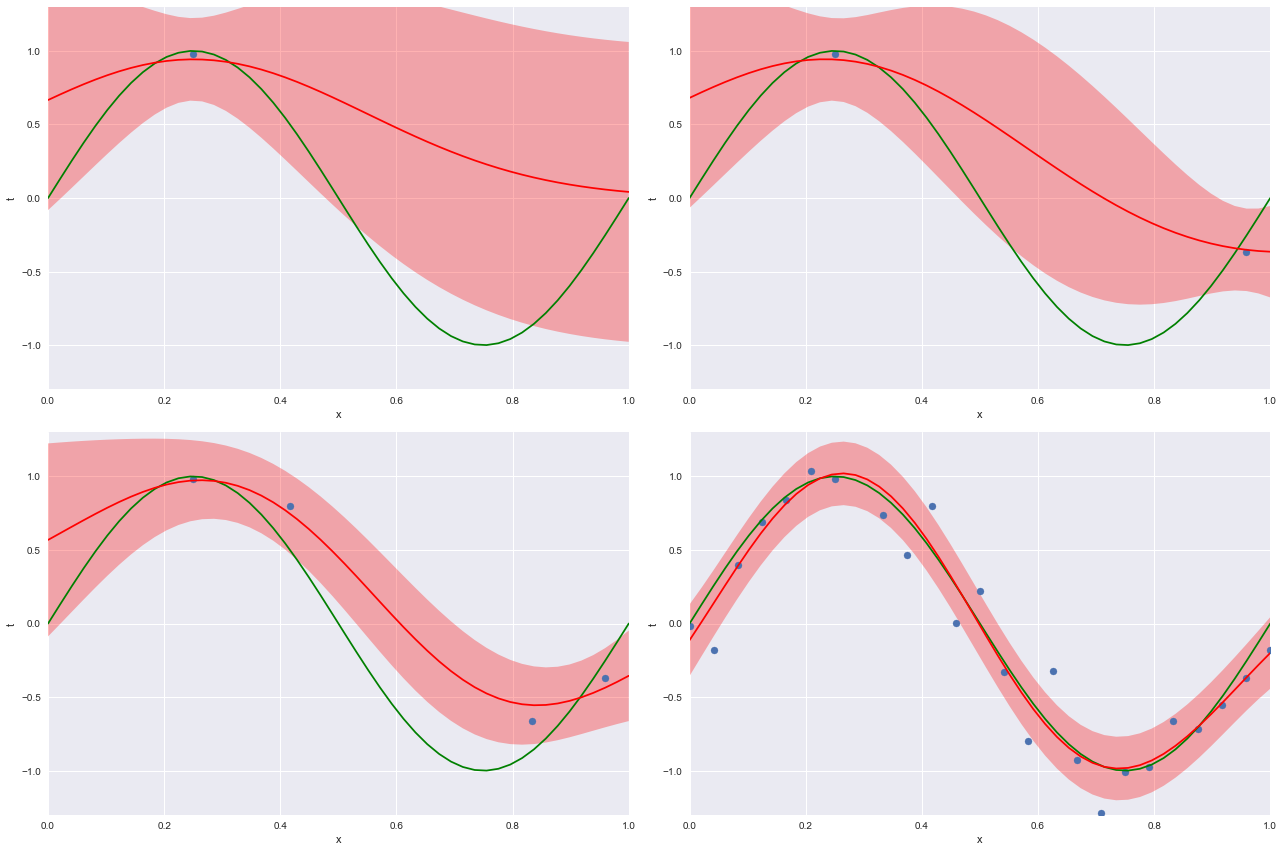

In [9]:
figure, axarr = plt.subplots(nrows=2, ncols=2, figsize=[18, 12])

# plot truth
plotTruth(axarr[0, 0])
plotTruth(axarr[0, 1])
plotTruth(axarr[1, 0])
plotTruth(axarr[1, 1])

# plot predictions
plotPrediction(m1, SD1, axarr[0, 0])
plotPrediction(m2, SD2, axarr[0, 1])
plotPrediction(m4, SD4, axarr[1, 0])
plotPrediction(m25, SD25, axarr[1, 1])

# plot data points
plotObs(1, axarr[0, 0])
plotObs(2, axarr[0, 1])
plotObs(4, axarr[1, 0])
plotObs(25, axarr[1, 1])

for i in range(0, 2):
    for j in range(0, 2):
        axarr[i, j].set_ylim([-1.3, 1.3])
        axarr[i, j].set_xlim([0, 1])
        axarr[i, j].set_ylabel('t')
        axarr[i, j].set_xlabel('x')
        
plt.tight_layout()
sns.despine()
plt.show()